#Environment Setup and Project Initialization

This section prepares the Google Colab environment for the project by connecting it to Google Drive and navigating to the project directory where all code and data files are stored. Mounting Google Drive ensures that files persist across Colab sessions, while changing the working directory allows the notebook to access local project files such as scripts and datasets. The directory check at the end serves as a simple sanity check to confirm that the correct project folder and expected files are available before proceeding.

In [5]:
#from google.colab import drive
#drive.mount("/content/drive")
#PROJECT_PATH = "/content/drive/MyDrive/comp551-Ass1"
#%cd $PROJECT_PATH

import os
print("Current directory:", os.getcwd())
print("Files here:", os.listdir())

Current directory: C:\Users\raese\Documents\PhD\Classes\COMP551\comp551-Ass1
Files here: ['.git', '.gitignore', '.ipynb_checkpoints', 'COMP551-1.ipynb', 'data', 'data_parser.py', 'feature_engineering.py', 'linear_regression.py', 'Untitled.ipynb', 'Untitled1.ipynb', '__pycache__']


Importing the Data Processing Utilities

In this step, we import the preprocessing function responsible for loading and preparing the Bike Sharing dataset, as well as NumPy for numerical operations. The process_csv function handles data cleaning, encoding of categorical variables, feature scaling, and the train–test split, allowing the rest of the notebook to work directly with clean, machine-learning-ready NumPy arrays.

In [6]:
from data_parser import process_csv
import numpy as np

## Data Exploration

In [7]:
#Load and inspect data
raw_df = pd.read_csv("data/day.csv")

print("Number of samples:", raw_df.shape[0])
print("Number of features:", raw_df.shape[1])

print("\nFeature names:")
print(list(raw_df.columns))

print("\nData types:")
print(raw_df.dtypes)

print('\n\nView dataset sample:')
raw_df.head()


Number of samples: 731
Number of features: 16

Feature names:
['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

Data types:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


View dataset sample:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


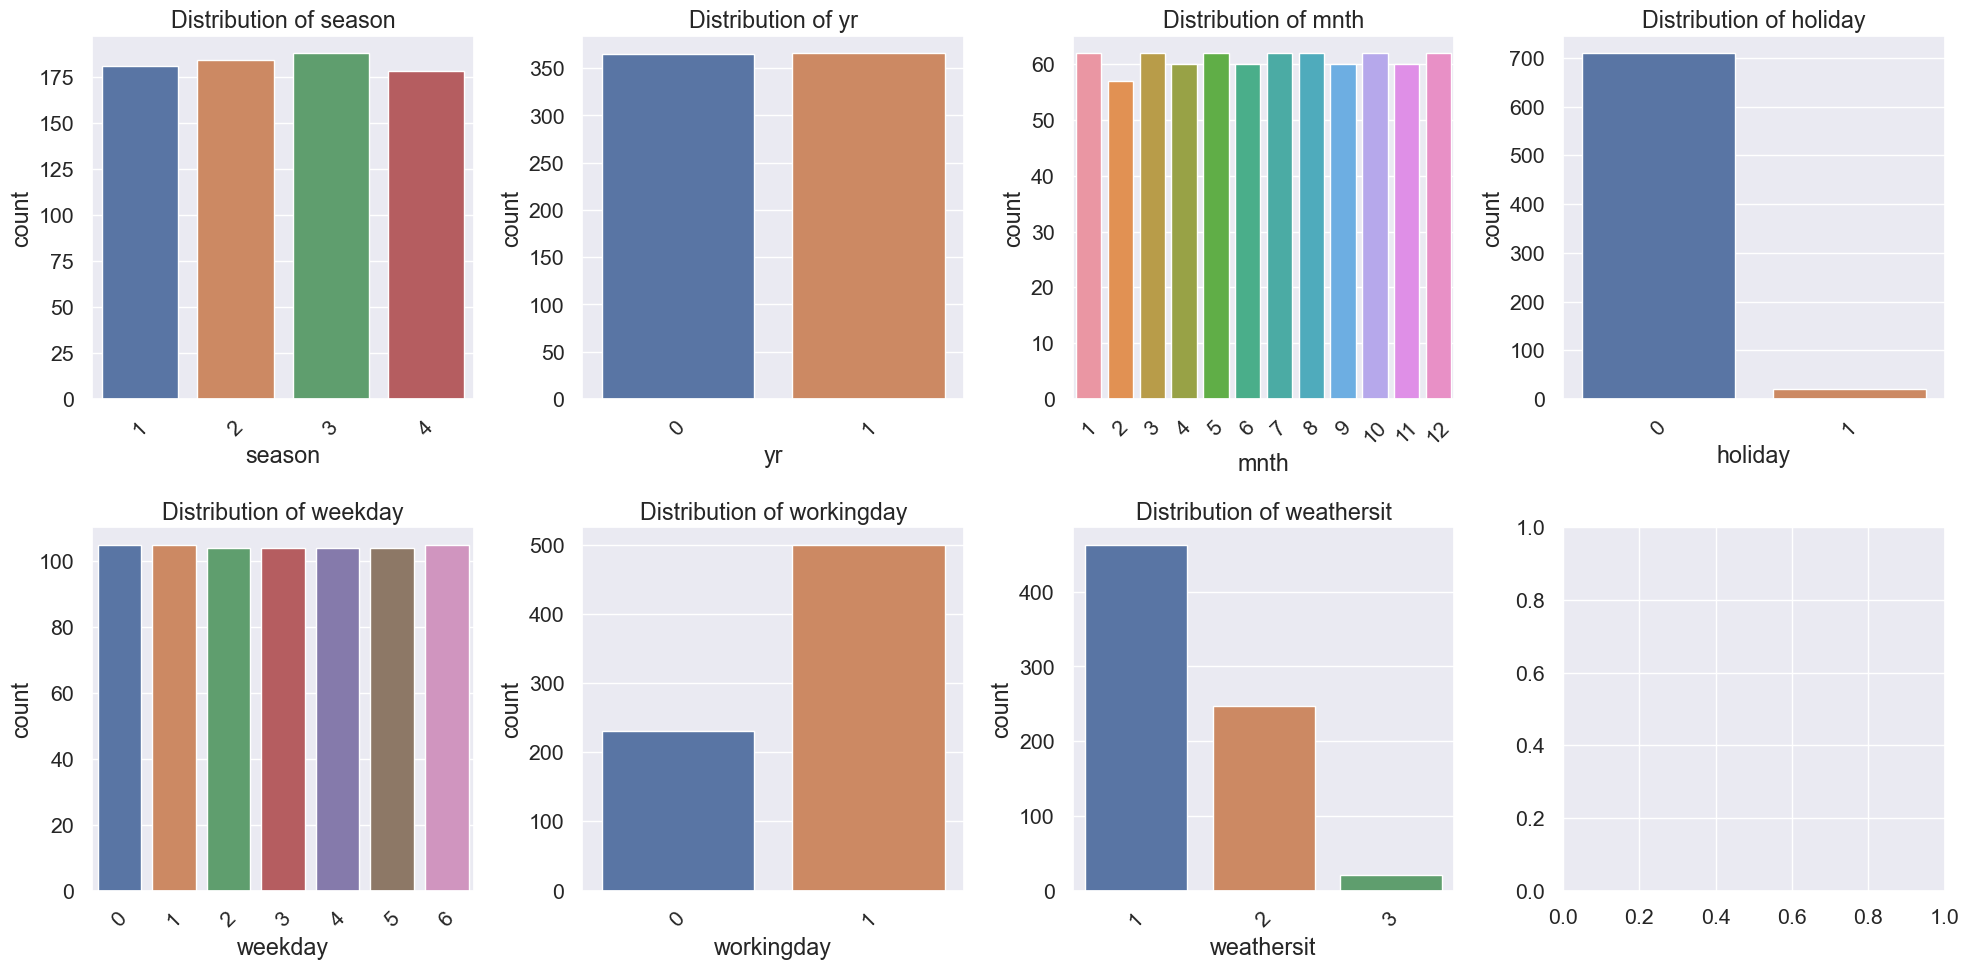

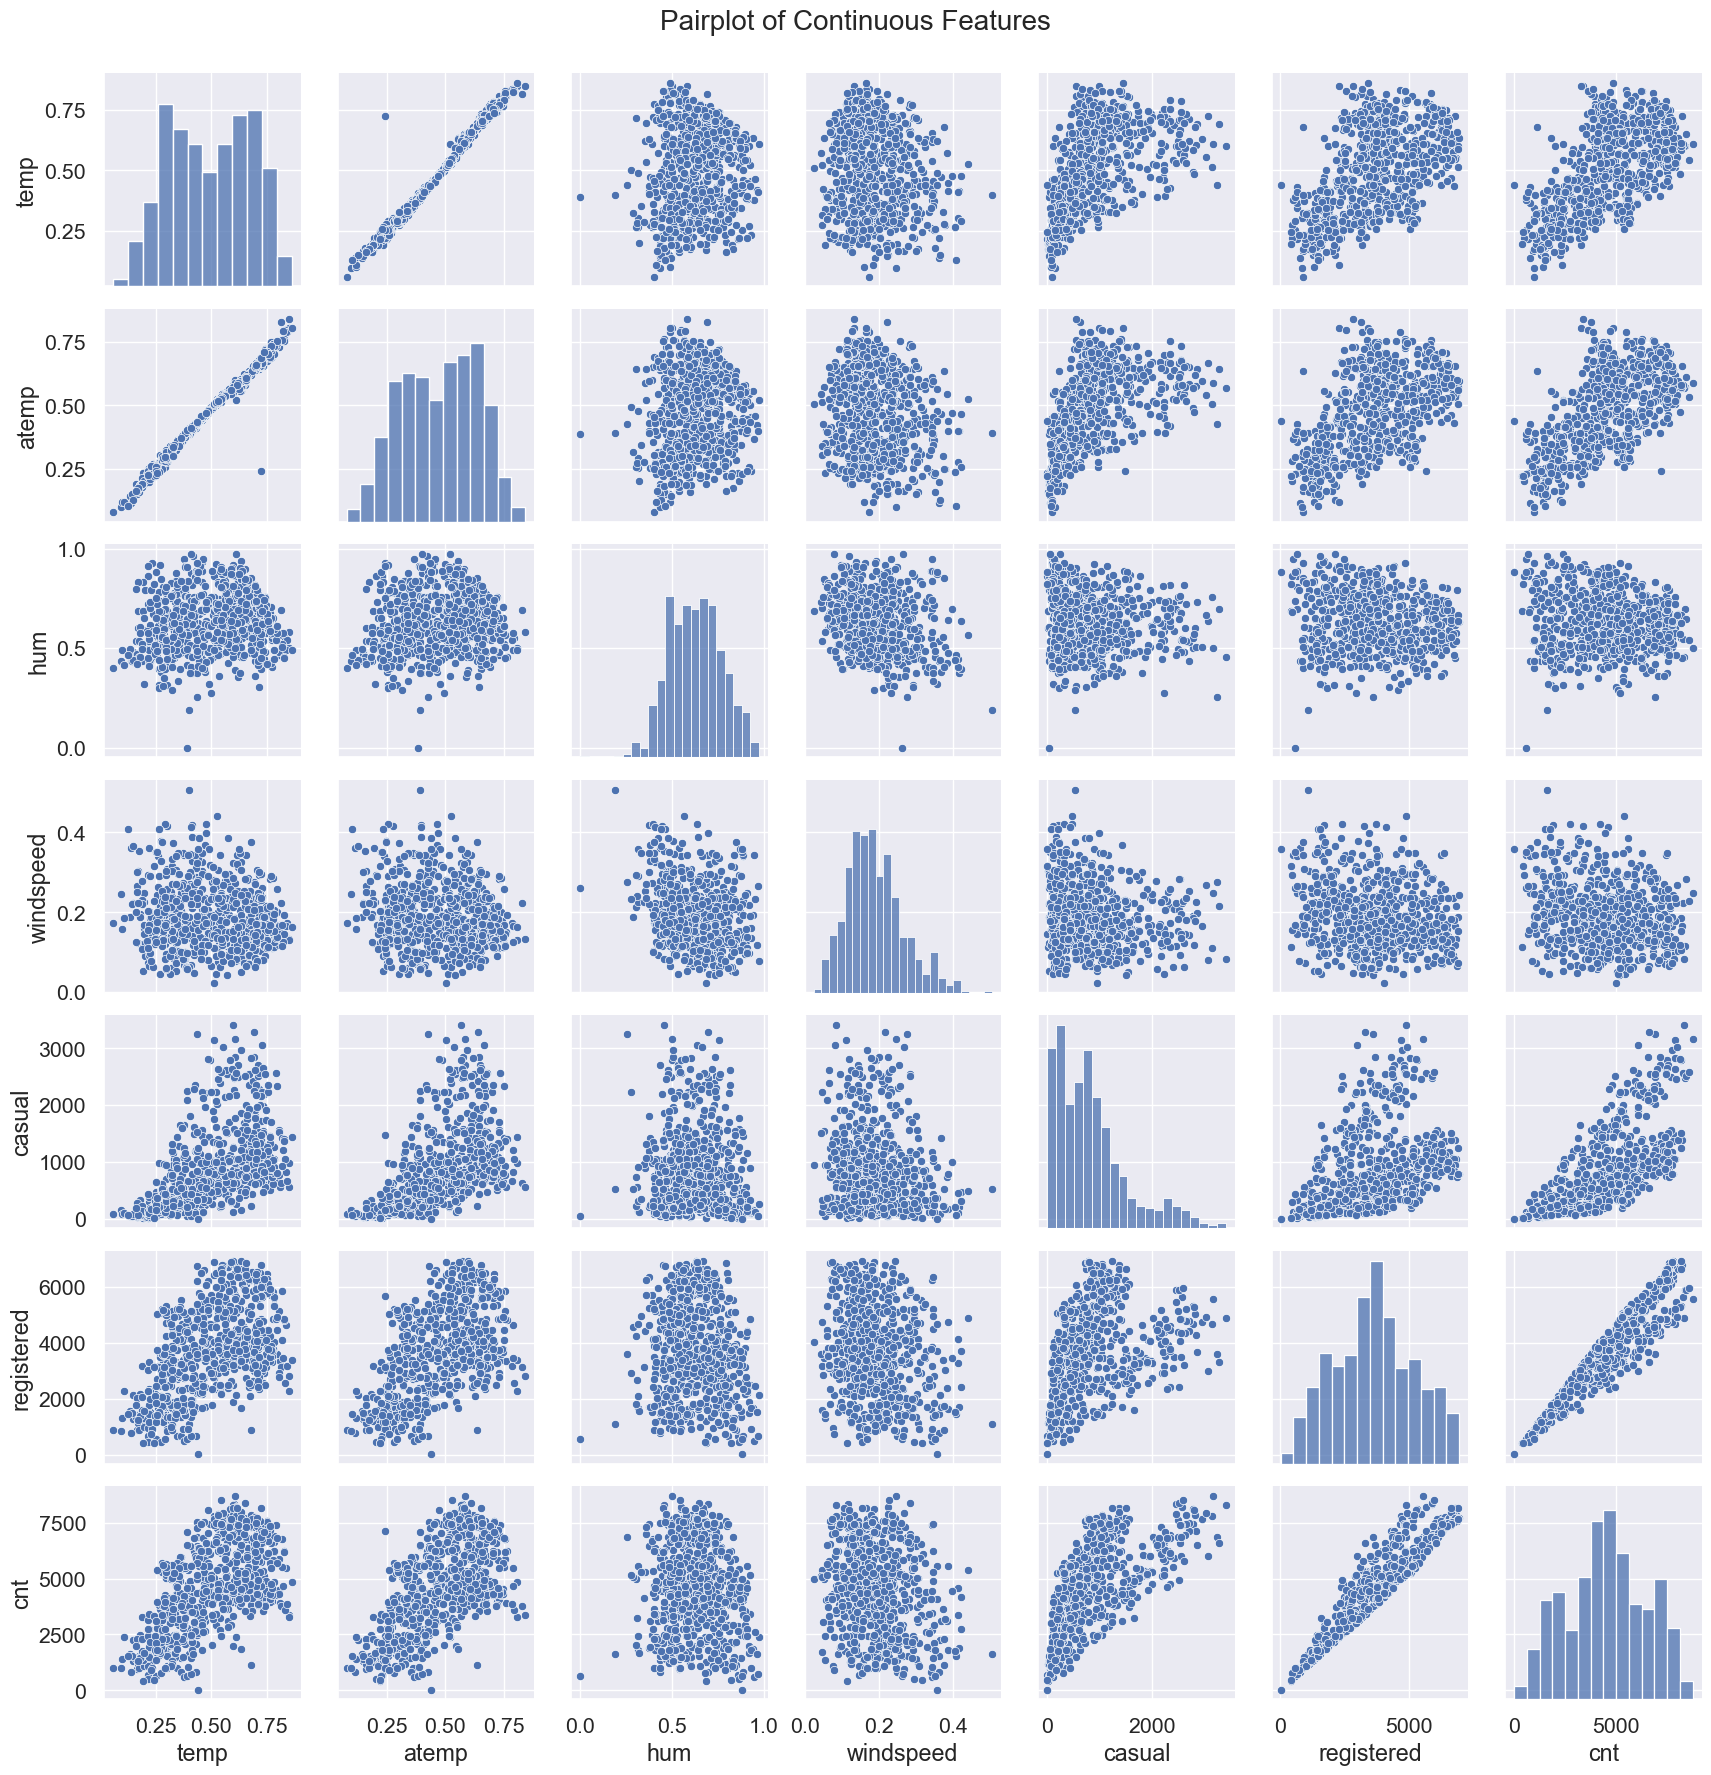

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


# Define feature groups
categorical = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
binary = ['holiday', 'workingday']  # Subset of categorical, but bars work same
continuous = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
ignore = ['instant', 'dteday']  # Skip index and date for univariate dist


# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
sns.set(font_scale=1.4) 

# 1. Distribution of Categorical features (including binary)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(categorical):
    sns.countplot(data=raw_df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

#2. Distribution of Continous features
sns.pairplot(raw_df[continuous], diag_kind='hist')
plt.suptitle('Pairplot of Continuous Features', y=1.02, fontsize=20)
plt.show()

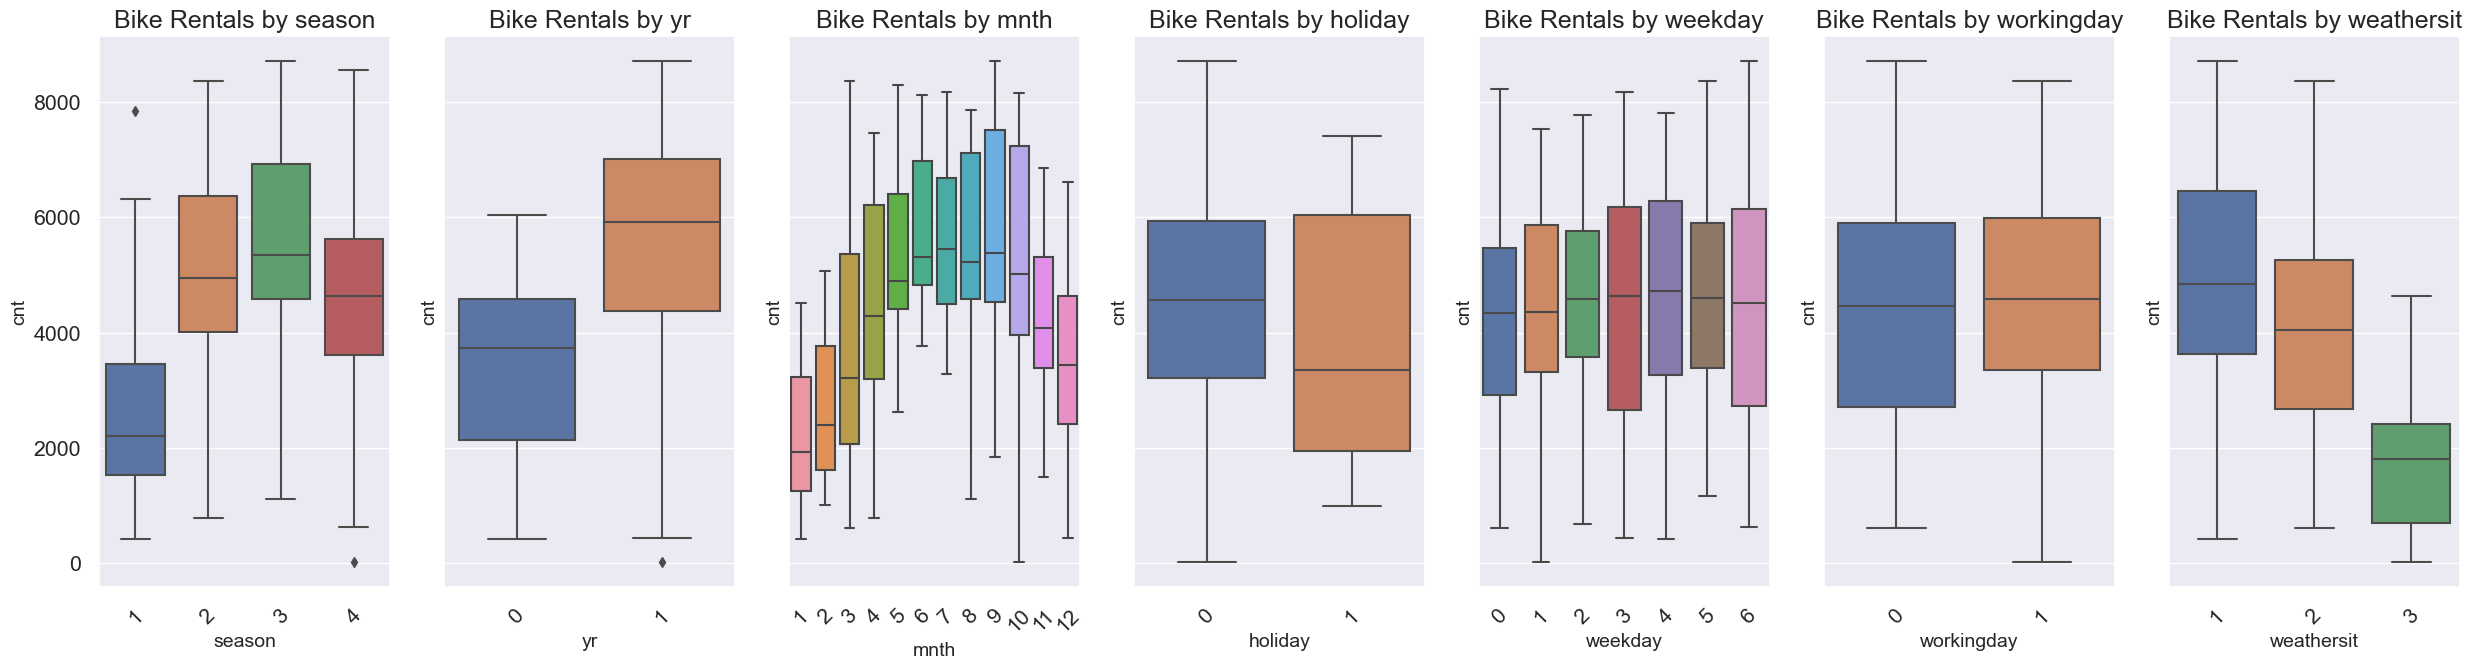

In [9]:
#3. Categorical feature by target
fig, axes = plt.subplots(1, 7, figsize=(25, 7), sharey=True)

for i, feature in enumerate(categorical):  
    sns.boxplot(x=feature, y="cnt", data=raw_df, ax=axes[i])
    axes[i].set_xlabel(feature, fontsize=14)
    axes[i].set_ylabel("cnt", fontsize=14)
    axes[i].set_title(f"Bike Rentals by {feature}", fontsize=18)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

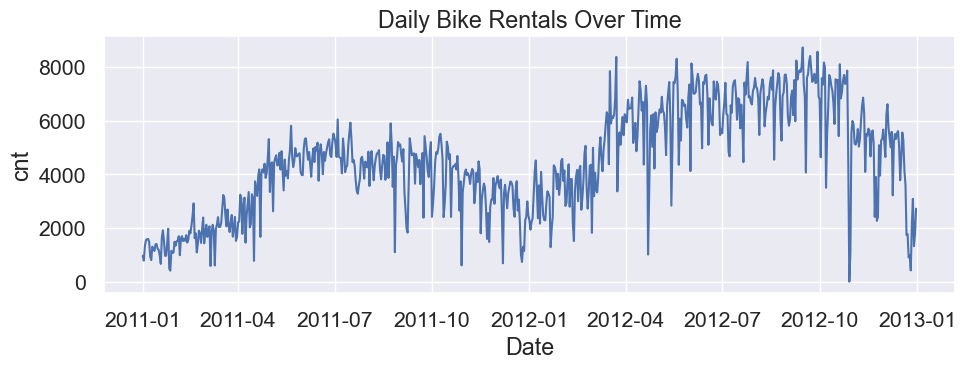

In [10]:
#4.Target Vs Time
raw_df["dteday"] = pd.to_datetime(raw_df["dteday"])
raw_df_sorted = raw_df.sort_values("dteday")

plt.figure(figsize=(10, 4))
plt.plot(raw_df_sorted["dteday"], raw_df_sorted["cnt"])
plt.xlabel("Date")
plt.ylabel("cnt")
plt.title("Daily Bike Rentals Over Time")
plt.tight_layout()
plt.show()

In [11]:
missing_counts = raw_df.isnull().sum()
print("Total missing values in dataset:", missing_counts.sum())
missing_counts

Total missing values in dataset: 0


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
print("Temperature range:", raw_df["temp"].min()," to ", raw_df["temp"].max())
raw_df["temp"].unique()

Temperature range: 0.0591304  to  0.861667


array([0.344167 , 0.363478 , 0.196364 , 0.2      , 0.226957 , 0.204348 ,
       0.196522 , 0.165    , 0.138333 , 0.150833 , 0.169091 , 0.172727 ,
       0.16087  , 0.233333 , 0.231667 , 0.175833 , 0.216667 , 0.292174 ,
       0.261667 , 0.1775   , 0.0591304, 0.0965217, 0.0973913, 0.223478 ,
       0.2175   , 0.195    , 0.203478 , 0.216522 , 0.180833 , 0.192174 ,
       0.26     , 0.186957 , 0.211304 , 0.285833 , 0.271667 , 0.220833 ,
       0.134783 , 0.144348 , 0.189091 , 0.2225   , 0.316522 , 0.415    ,
       0.266087 , 0.318261 , 0.435833 , 0.521667 , 0.399167 , 0.285217 ,
       0.303333 , 0.182222 , 0.221739 , 0.295652 , 0.364348 , 0.2825   ,
       0.343478 , 0.407273 , 0.266667 , 0.335    , 0.198333 , 0.384167 ,
       0.376522 , 0.261739 , 0.2925   , 0.295833 , 0.389091 , 0.329167 ,
       0.384348 , 0.325217 , 0.317391 , 0.365217 , 0.54     , 0.4725   ,
       0.3325   , 0.430435 , 0.441667 , 0.346957 , 0.285    , 0.264167 ,
       0.265833 , 0.253043 , 0.264348 , 0.3025   , 

In [13]:
print("Humidity range:", raw_df["hum"].min()," to ", raw_df["hum"].max())
raw_df["hum"].unique()

Humidity range: 0.0  to  0.9725


array([0.805833, 0.696087, 0.437273, 0.590435, 0.436957, 0.518261,
       0.498696, 0.535833, 0.434167, 0.482917, 0.686364, 0.599545,
       0.470417, 0.537826, 0.49875 , 0.48375 , 0.5375  , 0.861667,
       0.741739, 0.538333, 0.457083, 0.4     , 0.436522, 0.491739,
       0.616957, 0.8625  , 0.6875  , 0.793043, 0.651739, 0.722174,
       0.60375 , 0.829565, 0.775417, 0.437826, 0.585217, 0.929167,
       0.568333, 0.738333, 0.537917, 0.494783, 0.437391, 0.506364,
       0.544167, 0.457391, 0.375833, 0.314348, 0.423478, 0.505   ,
       0.516667, 0.187917, 0.407826, 0.605   , 0.577778, 0.423043,
       0.697391, 0.712174, 0.68    , 0.876364, 0.535   , 0.449583,
       0.318333, 0.610417, 0.789167, 0.948261, 0.551304, 0.420833,
       0.      , 0.649565, 0.594583, 0.527391, 0.496957, 0.655652,
       0.776522, 0.602917, 0.525217, 0.379167, 0.47375 , 0.737391,
       0.624583, 0.839565, 0.495   , 0.394167, 0.493913, 0.302174,
       0.314167, 0.646667, 0.918333, 0.68625 , 0.65375 , 0.48 

In [14]:
print("Windspeed range:", raw_df["windspeed"].min()," to ", raw_df["windspeed"].max())
raw_df["windspeed"].unique()

Windspeed range: 0.0223917  to  0.507463


array([0.160446 , 0.248539 , 0.248309 , 0.160296 , 0.1869   , 0.0895652,
       0.168726 , 0.266804 , 0.36195  , 0.223267 , 0.122132 , 0.304627 ,
       0.301    , 0.126548 , 0.157963 , 0.188433 , 0.194017 , 0.146775 ,
       0.208317 , 0.195904 , 0.353242 , 0.17197  , 0.2466   , 0.15833  ,
       0.129796 , 0.29385  , 0.113837 , 0.1233   , 0.145365 , 0.0739826,
       0.187192 , 0.053213 , 0.264308 , 0.277752 , 0.127839 , 0.161079 ,
       0.1418   , 0.0454083, 0.188839 , 0.221935 , 0.10855  , 0.203367 ,
       0.260883 , 0.417908 , 0.291374 , 0.251791 , 0.230104 , 0.264925 ,
       0.507463 , 0.223235 , 0.307846 , 0.195683 , 0.094113 , 0.250496 ,
       0.346539 , 0.186571 , 0.125248 , 0.289686 , 0.216425 , 0.307833 ,
       0.225754 , 0.203346 , 0.251871 , 0.343287 , 0.341352 , 0.12065  ,
       0.22015  , 0.261877 , 0.23297  , 0.220775 , 0.270604 , 0.136926 ,
       0.184309 , 0.203117 , 0.209579 , 0.231017 , 0.368167 , 0.207721 ,
       0.288783 , 0.22575  , 0.234261 , 0.243787 , 

In [15]:
print("Target (cnt) range:", raw_df["cnt"].min()," to ", raw_df["cnt"].max())
raw_df["cnt"].unique()

Target (cnt) range: 22  to  8714


array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321, 1263,
       1162, 1406, 1421, 1248, 1204, 1000,  683, 1650, 1927, 1543,  981,
        986, 1416, 1985,  506,  431, 1167, 1098, 1096, 1501, 1360, 1526,
       1550, 1708, 1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589,
       1913, 1815, 2115, 2475, 2927, 1635, 1812, 1107, 1450, 1917, 1807,
       1461, 1969, 2402, 1446, 1851, 2134, 1685, 1944, 2077,  605, 1872,
       2133, 1891,  623, 1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239,
       3117, 2471, 2703, 2121, 1865, 2210, 2496, 1693, 2028, 2425, 1536,
       2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455, 2895, 3348,
       2034, 2162, 3267, 3126,  795, 3744, 3429, 3204, 3944, 4189, 1683,
       4036, 4191, 4073, 4400, 3872, 4058, 4595, 5312, 3351, 4401, 4451,
       2633, 4433, 4608, 4714, 4333, 4362, 4803, 4182, 4864, 4105, 3409,
       4553, 3958, 4123, 3855, 4575, 4917, 5805, 4660, 4274, 4492, 4978,
       4677, 4679, 4758, 4788, 4098, 3982, 3974, 49

Loading and Preprocessing the Dataset

Here, we apply all preprocessing steps in one call. This function reads the raw CSV file, validates the data, encodes categorical variables, standardizes continuous features, and performs a time-aware train–test split. The result is four NumPy arrays: training inputs, testing inputs, and their corresponding target values, which are ready to be used directly for model training and evaluation.

In [5]:
X_train, X_test, y_train, y_test = process_csv("data/day.csv")

Ensuring Numeric Data Types

Here, we convert all input and target arrays to float64 to guarantee compatibility with NumPy’s linear algebra operations and avoid issues caused by mixed data types during model training.

In [6]:
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
y_train = y_train.astype(np.float64)
y_test = y_test.astype(np.float64)

In [7]:
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)

X_train dtype: float64
y_train dtype: float64


#Inspecting Dataset Dimensions

This cell prints the shapes of the training and testing inputs and targets to verify that the data has been split correctly and that each input matrix aligns with its corresponding label vector.

In [8]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (584, 29)
X_test shape: (147, 29)
y_train shape: (584,)
y_test shape: (147,)


Previewing Sample Data

This step displays a few rows from the training data and their corresponding target values as a quick sanity check. It helps confirm that the features and labels look reasonable before training the model.

In [9]:
print(X_train[:3])
print(y_train[:3])

[[ 1.          0.          0.         -0.81385634  1.23613525 -0.44488315
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.          1.          0.          0.        ]
 [ 1.          0.          0.         -0.71121466  0.49355952  0.71244778
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.        ]
 [ 1.          0.          0.         -1.59945776 -1.25765687  0.70942613
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.          0.
   0.          0.          0.          0.          0.     

#Implementing Linear Regression from Scratch

This part creates the linear_regression.py and defines a simple linear regression model using NumPy. The fit method learns the weight vector using a stable closed-form solution, while the predict method uses those learned weights to generate predictions through matrix multiplication.

In [10]:
%%writefile linear_regression.py
import numpy as np

class LinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        self.w = np.linalg.lstsq(X, y, rcond=None)[0]

    def predict(self, X):
        return X @ self.w

Overwriting linear_regression.py


#Training the Linear Regression Model

Here, we initialize the linear regression model and fit it to the training data. This process learns the optimal weight vector that best maps the input features to the target bike rental counts.

In [11]:
from linear_regression import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

In [12]:
print("Weight vector shape:", model.w.shape)

Weight vector shape: (29,)


Generating Model Predictions

Here, we use the trained linear regression model to generate predictions for both the training and testing datasets. These predicted values will be used to evaluate how well the model fits the data and how it generalizes to unseen examples.

In [13]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [14]:
print(y_train_pred.shape)
print(y_test_pred.shape)

(584,)
(147,)


In [15]:
print("True:", y_train[:5])
print("Pred:", y_train_pred[:5])

True: [ 985.  801. 1349. 1562. 1600.]
Pred: [1303.61781844  993.39686106 1206.20983334 1385.36075853 1567.21709833]


#Defining the Mean Squared Error Metric

This cell defines a simple function to compute Mean Squared Error, which measures the average squared difference between the true target values and the model’s predictions.

In [16]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)



Evaluating Baseline Model Performance

This step computes and reports the Mean Squared Error on both the training and testing sets, providing a baseline measure of how well the linear regression model fits the data and generalizes to unseen observations.

In [17]:
train_mse = mse(y_train, y_train_pred)
test_mse = mse(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

Training MSE: 462669.79441381706
Test MSE: 1218080.5473418422


Interpreting Error in Original Units

Here, we compute the Root Mean Squared Error to express the model’s prediction error in the original unit of bike rentals, making the results easier to interpret in practical terms.

In [18]:
print("Training RMSE:", np.sqrt(train_mse))
print("Test RMSE:", np.sqrt(test_mse))

Training RMSE: 680.1983493171805
Test RMSE: 1103.6668642945851


#Feature Engineering
Identifying Continuous Feature Indices

This parts inspects the feature matrix to locate the indices of continuous variables used for feature engineering. We are examining feature magnitudes in a sample row to distinguish standardized continuous features from binary one-hot encoded columns, allowing us to target only the appropriate variables for nonlinear transformations.

In [19]:
print("Number of features:", X_train.shape[1])

Number of features: 29


In [20]:
X_train[0]

array([ 1.        ,  0.        ,  0.        , -0.81385634,  1.23613525,
       -0.44488315,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  1.        ,  0.        ,  0.        ])

In [21]:
for i, v in enumerate(X_train[0]):
    if abs(v) > 0.2 and abs(v) < 2:
        print(i, v)

0 1.0
3 -0.8138563421371906
4 1.236135247071073
5 -0.4448831480680497
25 1.0
26 1.0


In this step, we explicitly record the column indices corresponding to temperature, humidity, and wind speed. These indices are used to apply polynomial and interaction-based feature engineering only to the continuous variables.

In [22]:
temp_idx = 3
hum_idx = 4
wind_idx = 5

In [23]:
print(X_train[0, temp_idx],
      X_train[0, hum_idx],
      X_train[0, wind_idx])

-0.8138563421371906 1.236135247071073 -0.4448831480680497


Adding Nonlinear Feature Engineering

This part defines a utility function that augments the original feature matrix with polynomial and interaction terms derived from temperature, humidity, and wind speed. These additional features allow the linear regression model to capture nonlinear effects and interactions between weather variables while keeping the model itself linear in its parameters.

In [24]:
%%writefile feature_engineering.py
import numpy as np

def add_nonlinear_features(X, temp_idx, hum_idx, wind_idx):
    """
    Adds polynomial and interaction features for selected continuous columns.

    Parameters:
    - X: NumPy array (already includes bias column)
    - temp_idx, hum_idx, wind_idx: indices of continuous features

    Returns:
    - X_new: expanded feature matrix
    """

    # Extract continuous features
    temp = X[:, temp_idx]
    hum = X[:, hum_idx]
    wind = X[:, wind_idx]

    # Polynomial features
    temp_sq = temp ** 2
    hum_sq = hum ** 2
    wind_sq = wind ** 2

    # Interaction features
    temp_hum = temp * hum
    temp_wind = temp * wind
    hum_wind = hum * wind

    # Concatenate original features with new ones
    X_new = np.column_stack([
        X,
        temp_sq,
        hum_sq,
        wind_sq,
        temp_hum,
        temp_wind,
        hum_wind
    ])

    return X_new

Overwriting feature_engineering.py


Applying Feature Engineering to the Dataset

Here, we apply the nonlinear feature expansion to both the training and testing sets, ensuring consistency between them. Printing the shapes confirms that new features were added correctly while keeping the number of data points unchanged.

In [25]:
from feature_engineering import add_nonlinear_features

In [26]:
X_train_fe = add_nonlinear_features(X_train, temp_idx, hum_idx, wind_idx)
X_test_fe = add_nonlinear_features(X_test, temp_idx, hum_idx, wind_idx)

In [27]:
print("Original X_train shape:", X_train.shape)
print("Feature-engineered X_train shape:", X_train_fe.shape)

Original X_train shape: (584, 29)
Feature-engineered X_train shape: (584, 35)


Training and Evaluating the Feature-Engineered Model

This step retrains the linear regression model using the feature-engineered inputs and evaluates its performance. By comparing the training and test MSE before and after feature engineering, we can see the impact of adding polynomial and interaction terms, confirming that the enhanced features lead to improved model fit.

In [28]:
from linear_regression import LinearRegression

model_fe = LinearRegression()
model_fe.fit(X_train_fe, y_train)

In [29]:
y_train_pred_fe = model_fe.predict(X_train_fe)
y_test_pred_fe = model_fe.predict(X_test_fe)

In [30]:
train_mse_fe = mse(y_train, y_train_pred_fe)
test_mse_fe = mse(y_test, y_test_pred_fe)

print("Training MSE (before):", train_mse)
print("Training MSE (after): ", train_mse_fe)

print("Test MSE (before):", test_mse)
print("Test MSE (after): ", test_mse_fe)

Training MSE (before): 462669.79441381706
Training MSE (after):  376557.30994621356
Test MSE (before): 1218080.5473418422
Test MSE (after):  1023757.6634041744
